Energia máxima acumulada na mochila do Shenlong: 240.0
Fração de energia dos itens escolhidos: [1, 1, 0.6666666666666666]


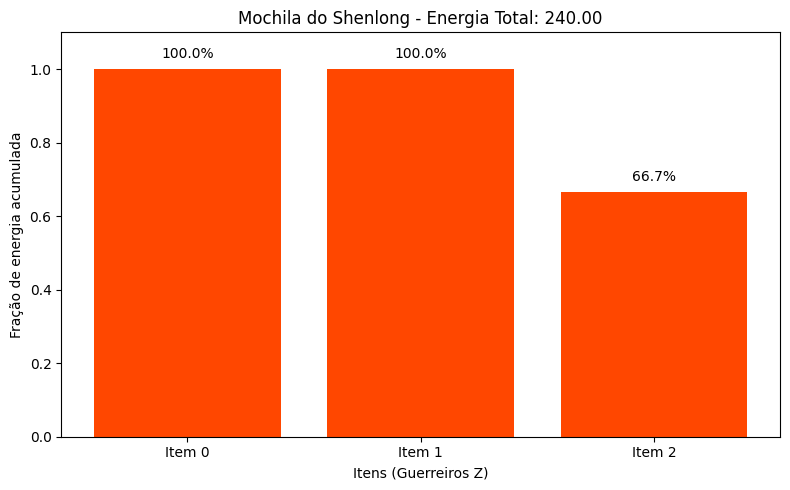

In [20]:
#Mochila Fracionária de Shenlong
import matplotlib.pyplot as plt

def mochila_do_shenlong(valores, pesos, capacidade_da_esfera):
    # Cria uma lista de itens: (valor, peso, valor_por_peso, índice)
    itens = [(valores[kame], pesos[kame], valores[kame] / pesos[kame], kame) for kame in range(len(valores))]
    
    # Ordena os itens pela razão valor/peso (descendente)
    itens.sort(key=lambda goku: goku[2], reverse=True)
    
    # Inicializa o valor total coletado (energia total)
    energia_total = 0.0
    # Inicializa a capacidade restante da mochila (capacidade da esfera)
    capacidade_restante = capacidade_da_esfera
    # Lista para armazenar as frações escolhidas de cada item
    frações_do_ki = [0] * len(valores)  # Fração de cada item (Ki utilizado)
    
    # Itera sobre a lista ordenada de itens
    for valor, peso, razão_ki, índice in itens:
        # Se o peso do item é menor ou igual à capacidade restante, pega tudo
        if peso <= capacidade_restante:
            energia_total += valor
            frações_do_ki[índice] = 1  # 100% do Ki usado
            capacidade_restante -= peso
        else:
            # Se o item não cabe inteiro, pega apenas a fração possível
            fração = capacidade_restante / peso
            energia_total += valor * fração
            frações_do_ki[índice] = fração
            break  # A esfera do dragão está cheia
    
    # Retorna o valor total e as frações usadas
    return energia_total, frações_do_ki

# Exemplo de uso
valores = [60, 100, 120]  # Valor de cada item (energia dos guerreiros)
pesos = [10, 20, 30]  # Peso de cada item (carga Ki)
capacidade_da_esfera = 50  # Capacidade máxima (energia Shenlong)

energia_coletada, frações_usadas = mochila_do_shenlong(valores, pesos, capacidade_da_esfera)

print("Energia máxima acumulada na mochila do Shenlong:", energia_coletada)
print("Fração de energia dos itens escolhidos:", frações_usadas)

# Gráfico das frações escolhidas
plt.figure(figsize=(8, 5))
itens_indices = range(len(valores))
plt.bar(itens_indices, frações_usadas, tick_label=[f"Item {vegeta}" for vegeta in itens_indices], color='#ff4700')
plt.xlabel('Itens (Guerreiros Z)')
plt.ylabel('Fração de energia acumulada')
plt.title(f'Mochila do Shenlong - Energia Total: {energia_coletada:.2f}')
plt.ylim(0, 1.1)
for vegeta, fração in enumerate(frações_usadas):
    plt.text(vegeta, fração + 0.03, f"{fração*100:.1f}%", ha='center')

plt.tight_layout()
plt.show()


In [14]:
# Resolvendo problema da mochila fracionária do Sr Kaio recursivamente.

def mochila_SrKaio_recursiva(values, weights, capacity, index=0, chosen_fractions=None, items=None):
    """
    Resolve o problema da mochila fracionária recursivamente.
    :param values: Lista de valores dos itens.
    :param weights: Lista de pesos dos itens.
    :param capacity: Capacidade total da mochila.
    :param index: Índice do item atual.
    :param chosen_fractions: Lista para rastrear as frações escolhidas.
    :param items: Lista ordenada de itens (valor, peso, razão, índice).
    :return: Valor máximo obtido e as frações escolhidas.
    """
    # Caso base: sem mais itens ou capacidade
    if index >= len(items) or capacity <= 0:
        return 0, chosen_fractions

    # Obtém os dados do item atual
    value, weight, ratio, original_index = items[index]

    # Se o peso do item atual for menor ou igual à capacidade restante
    if weight <= capacity:
        # Pode pegar o item inteiro
        # Marca como totalmente escolhido
        chosen_fractions[original_index] = 1
        # Chamada recursiva para o próximo item com capacidade reduzida
        total_value_ofPower, chosen_fractions = mochila_SrKaio_recursiva(
            values, weights, capacity - weight, index + 1, chosen_fractions, items
        )
        # Adiciona o valor do item atual
        total_value_ofPower += value
    else:
        # Pega apenas a fração necessária para completar a capacidade
        fraction = capacity / weight
        # Marca a fração escolhida
        chosen_fractions[original_index] = fraction
        # Adiciona o valor proporcional
        total_value_ofPower = value * fraction
        # Retorna diretamente, pois a mochila estará cheia
        return total_value_ofPower, chosen_fractions

    return total_value_ofPower, chosen_fractions


# Função wrapper que realiza a ordenação antes da recursão
def mochila_SrKaio(values, weights, capacity):
    """
    Função de entrada para resolver o problema da mochila fracionária.
    Ordena os itens e inicia a recursão.
    """
    # Cria a lista de itens com (valor, peso, valor_por_peso, índice original)
    items = [(values[i], weights[i], values[i] / weights[i], i) for i in range(len(values))]
    # Ordena os itens pela razão valor/peso (maior primeiro)
    items.sort(key=lambda x: x[2], reverse=True)
    # Inicializa as frações escolhidas como 0 para todos os itens
    chosen_fractions = [0] * len(values)
    # Chama a função recursiva com os itens ordenados
    return mochila_SrKaio_recursiva(values, weights, capacity, 0, chosen_fractions, items)


# Exemplo de uso
values = [60, 100, 120]  # para o poder de luta dos itens
weights = [10, 20, 30]   # para o peso de carregar o item
capacity = 50            # para a capacidade máxima da mochila do Sr Kaio
result_value, result_fractions = mochila_SrKaio(values, weights, capacity)

print("O poder máximo na mochila do Sr Kaio:", result_value)
# RESPOSTA ESPERADA
# Valor máximo na mochila fracionária: 240.0
print("Frações escolhidas:", result_fractions)
# RESPOSTA ESPERADA
# Frações escolhidas: [1, 1, 0.6666666666666666]


O poder máximo na mochila do Sr Kaio: 240.0
Frações escolhidas: [1, 1, 0.6666666666666666]


Atividades selecionadas (recursivo): [(1, 2), (3, 4), (5, 7), (8, 9)]


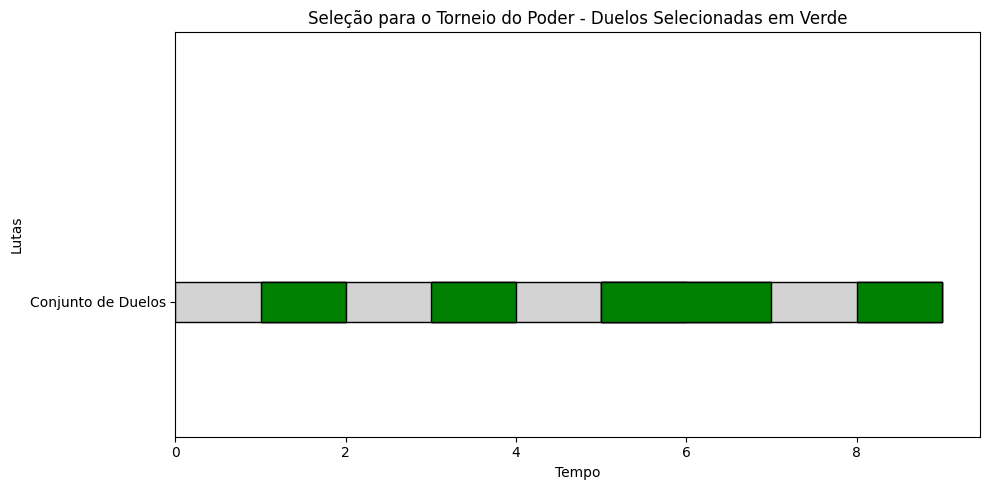

In [27]:
#algoritmo para seleção de atividades:  Torneio do Poder
import matplotlib.pyplot as plt

def selecao_Torneio_do_Poder(inicio_torneio, finais_torneio, ultima_luta=-1, index=0):
    # Caso base: não há mais atividades para processar
    if index >= len(inicio_torneio):
        return []
# starts = [1, 3, 0, 5, 8, 5]
# finishes = [2, 4, 6, 7, 9, 9]
# [(1, 2)] + [(3, 4), (5, 7), (8, 9)] = [(1, 2), (3, 4), (5, 7), (8, 9)]
#   # [(3, 4)] + [(5, 7), (8, 9)] = [(3, 4), (5, 7), (8, 9)]
#   #   #   - [(5, 7), (8, 9)]
#   #   #   # [(5, 7)] + [(8, 9)] = [(5, 7), (8, 9)]
#   #   #   #   #   # [(8, 9)] + []
#   #   #   #   #   #   #  []
#   #   #   #   #   #   #  # []
    # Verifica se a atividade atual é compatível
    if inicio_torneio[index]>=ultima_luta:
        # Inclui a atividade atual
        include = [(inicio_torneio[index], finais_torneio[index])] + \
                  selecao_Torneio_do_Poder(inicio_torneio, finais_torneio, finais_torneio[index], index +1)

    else:
        # Pula a atividade atual
        include = selecao_Torneio_do_Poder(inicio_torneio, finais_torneio, ultima_luta, index+1)

    return include

def selecao_Torneio(inicio_torneio, finais_torneio):
    # Combina as listas de inícios (starts) e términos (finishes) em uma lista de tuplas (inicio, fim)
    activities = list(zip(inicio_torneio, finais_torneio))
    # Ordena as atividades pelo tempo de término (segunda posição da tupla) em ordem crescente
    activities.sort(key=lambda x: x[1])
    
    # Cria uma lista vazia para armazenar as atividades selecionadas
    duelos_torneio = []
    # Variável para rastrear o tempo de término da última atividade selecionada (inicialmente -1 para nenhuma atividade)
    ultima_luta = -1

    # Itera sobre cada atividade ordenada
    for inicio, fim in activities:
        # Verifica se a atividade atual começa após ou exatamente quando a última atividade selecionada termina
        if inicio >= ultima_luta:
            # Adiciona a atividade atual (inicio, fim) à lista de atividades selecionadas
            duelos_torneio.append((inicio, fim))
            # Atualiza o tempo de término da última atividade selecionada
            ultima_luta = fim
    # Retorna a lista de atividades selecionadas
    return duelos_torneio

# Exemplo de uso
inicio_ = [1, 3, 0, 5, 8, 5]
fim_ = [2, 4, 6, 7, 9, 9]

selected = selecao_Torneio(inicio_, fim_)

# Pré-processa ordenando por tempo de término
activities_order = sorted(zip(inicio_, fim_), key=lambda x: x[1])
inicio_order, fim_order = zip(*activities_order)

result = selecao_Torneio_do_Poder(inicio_order, fim_order)
print("Atividades selecionadas (recursivo):", result)
# RESPOSTA ESPERADA
# Atividades selecionadas (recursivo): [(1, 2), (3, 4), (5, 7), (8, 9)]

# Plot dos resultados
plt.figure(figsize=(10,5))
y_level = 1  # Para posicionar as barras das atividades
height = 0.3

# Plotar todas as atividades em uma cor neutra
for s, f in zip(inicio_, fim_):
    plt.barh(y_level, f - s, left=s, height=height, color='lightgray', edgecolor='black')
    
# Destacar as atividades selecionadas em outra cor
for s, f in selected:
    plt.barh(y_level, f - s, left=s, height=height, color='green', edgecolor='black')

plt.xlabel('Tempo')
plt.ylabel('Lutas')
plt.title('Seleção para o Torneio do Poder - Duelos Selecionadas em Verde')

# Ajusta o eixo Y para caber a barra
plt.yticks([y_level], ["Conjunto de Duelos"])
plt.ylim(y_level - 1, y_level + 2)
plt.tight_layout()
plt.show()

In [40]:
#Problema das moedas ou troco mínimo ==> Esferas gulosas
def coleta_esferas_gulosas_recursivas(esferas, valor_energia, index=0, contagem=0):
    """
    Resolvo o problema das esferas de energia (moedas) recursivamente usando uma abordagem gulosa;
    ::param moedas: Lista de denominações das esferas ordenadas em ordem decrescente.
    :param valor_energia: Energia restante a ser atingida.
    :param index: Índice da esfera atual a ser considerada.
    :param contagem: Contador de esferas coletadas até agora.
    :return: Número mínimo de esferas usadas ou float('inf') se não for possível.
    """ 

 # Caso base: valor restante é 0, solução encontrada
    if valor_energia == 0 :
        return contagem

    # Caso base: índice fora da lista ou valor restante negativo (solução inválida)
    if index >= len(esferas) or valor_energia <0:
        return float('inf')

# coins = [1, 5, 10, 25]
# amount = 63, index = 0, count = 0
# max_coins_for_this_denomination = 63 // 25 = 2
    # amount = 13, index = 1, count = 2
    # max_coins_for_this_denomination = 13 // 10 = 1
        # amount = 3, index = 2, count = 3
        # max_coins_for_this_denomination = 3 // 1 = 3
            # amount = 0, index = 3, count = 6
    # Escolha gulosa: pega o maior número possível da moeda atual

    max_esferas_para_energia = valor_energia// esferas[index] 

    # Chama recursivamente, reduzindo o valor restante
    return coleta_esferas_gulosas_recursivas(
        esferas, 
        valor_energia - max_esferas_para_energia * esferas[index],
        index +1,
        contagem +max_esferas_para_energia
        
    )

# Wrapper para ordenar as moedas antes da recursão
def coleta_esferas_gulosas(esferas, valor_energia):
    # Ordena as moedas em ordem decrescente para garantir a escolha gulosa
    esferas.sort(reverse=True)
    result = coleta_esferas_gulosas_recursivas(esferas, valor_energia)
    return result if result != float('inf') else -1


def coleta_esferas(esferas,valor_energia):
    """
    Encontra o número mínimo de esferas para atingir um determinado valor de energia.
    :param moedas: Lista de denominações das esferas.
    :param valor_energia: Energia-alvo.
    :return: Número total de esferas usadas e a combinação de esferas.
    """
    # Ordena as moedas em ordem decrescente
    esferas.sort(reverse=True)
    
    # Inicializa as variáveis
    total_esferas = 0    # Contador do número total de esferas usadas
    combinacao = []    # Lista para armazenar a combinação de esferas
    for esfera in esferas:
        # Calcula quantas esferas dessa denominação podem ser usadas
        contagem = valor_energia//esfera
        # se contagem for maior que 0
        if contagem > 0:
            combinacao.append((esfera, contagem))  # Adiciona a esfera e sua quantidade na solução
            # Atualiza o número total de esferas usadas
            total_esferas += contagem
            # Reduz o valor restante
            valor_energia -= contagem * esfera

        # Se o valor restante for zero, termina o processo
        if valor_energia == 0:
            break

    # Caso não seja possível formar o valor exatamente (exemplo: moedas insuficientes)
    if valor_energia > 0:
        return -1, []  # Retorna -1 indicando que não foi possível atingir o valor
    
    return total_esferas, combinacao

# Exemplo de uso
esferas = [1, 5, 10, 25]
energia_alvo = 63
total_esferas, combinacao_esferas = coleta_esferas(esferas, energia_alvo)

print("Número mínimo de esferas:", total_esferas)
# RESPOSTA ESPERADA
# Número mínimo de moedas: 6
print("Combinação de esferas:")
for esfera, contagem in combinacao_esferas:
    print(f"{contagem} esfera(s) de {esfera}")
    # RESPOSTA ESPERADA
    # 2 moeda(s) de 25
    # 1 moeda(s) de 10
    # 3 moeda(s) de 1

resultado_guloso = coleta_esferas_gulosas(esferas, energia_alvo)
print("Número mínimo de esferas (guloso e recursivo):", resultado_guloso)
# RESPOSTA ESPERADA
# Número mínimo de moedas (guloso e recursivo): 6


Número mínimo de esferas: 6
Combinação de esferas:
2 esfera(s) de 25
1 esfera(s) de 10
3 esfera(s) de 1
Número mínimo de esferas (guloso e recursivo): 6


In [5]:
#Algoritmo de Dijkstra - Dijkstra Z
def dijkstra_list(planeta, origem):
    """
    Encontra os menores caminhos de uma esfera de origem para todas as outras usando Dijkstra.
    Implementação usando lista simples em vez de fila de prioridade.
    
    :param planeta: Grafo representado como lista de adjacência {esfera: [(vizinho, peso), ...]}
    :param origem: Esfera de origem
    :return: Dicionário com menores distâncias para cada esfera
    """
    # Inicializa as distâncias com infinito
    distances = {esfera: float('inf') for esfera in planeta}
    distances[origem] = 0  #Distância da esfera de origem para ela mesma é 0

    # Lista de vértices não processados
    unvisited = list(planeta.keys())
    
    while unvisited:
        # Encontra o vértice não processado com a menor distância acumulada
        esfera_atual = min(unvisited, key=lambda esfera: distances[esfera])
        
        # Remove o vértice selecionado da lista de não processados
        unvisited.remove(esfera_atual)
        
        # Atualiza as distâncias dos vizinhos do vértice atual
        for neighbor, weight in planeta[esfera_atual]:
            # Calcula a nova distância acumulada para o vizinho
            new_distance = distances[esfera_atual] + weight
            # Atualiza se a nova distância for menor que a distância atual
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                
    
    return distances
# A = 0, B = 2, C = 3, D = 9, E = 6
#
# Esferas representando o grafo (planeta)
planeta= {
    'Esfera de 1 estrela': [('Esfera de 6 estrelas', 2), ('Esfera de 3 estrelas', 4)],
    'Esfera de 6 estrelas':[('Esfera de 1 estrela', 2), ('Esfera de 3 estrelas', 1), ('Esfera de 4 estrelas', 7)],
    'Esfera de 3 estrelas':[('Esfera de 1 estrela', 4), ('Esfera de 6 estrelas', 1), ('Esfera de 7 estrelas', 3)],
    'Esfera de 4 estrelas':[('Esfera de 6 estrelas', 7), ('Esfera de 7 estrelas', 1)],
    'Esfera de 7 estrelas':[('Esfera de 3 estrelas', 3), ('Esfera de 4 estrelas', 1)]
}

# Esfera de Origem
esfera_origem = 'Esfera de 1 estrela'
shortest_paths = dijkstra_list(planeta, esfera_origem)

# Imprime os resultados
print("Menor distância da", esfera_origem)
for esfera, distance in shortest_paths.items():
    print(f"Para {esfera}: {distance}")

# RESPOSTA ESPERADA
# Menor distância da cidade A
# Para A: 0
# Para B: 2
# Para C: 3
# Para D: 7
# Para E: 6

Menor distância da Esfera de 1 estrela
Para Esfera de 1 estrela: 0
Para Esfera de 6 estrelas: 2
Para Esfera de 3 estrelas: 3
Para Esfera de 4 estrelas: 7
Para Esfera de 7 estrelas: 6


In [21]:
#Algoritmo Dijkstra- Dijkstra Z Caminhos
def dijkstra_list(planeta, origem_esfera):
    """
    Reconstrói o caminho da esfera de origem até a esfera de destino usando predecessores.
    :param predecessores: Dicionário com os predecessores de cada esfera.
    :param origem_esfera: Esfera de origem.
    :param destino_esfera: Esfera de destino.
    :return: Lista com o caminho do início até o fim.
    """
    # Inicializa as distâncias com infinito
    distances = {esfera: float('inf') for esfera in planeta}
    # Distância da esfera de origem para ela mesma é 0
    distances[origem_esfera] = 0
    
    # Dicionário para rastrear o "pai" de cada esfera no caminho mais curto
    predecessors = {esfera: None for esfera in planeta}
    
    # Cria Lista de esferas não processados
    esferas_nao_visitadas = list(planeta.keys())

    # Enquanto houver vértices não processados
    while esferas_nao_visitadas:
        # Encontra o vértice não processado com a menor distância acumulada
        esfera_atual = min(esferas_nao_visitadas, key=lambda esfera: distances [esfera])
        
        # Remove o vértice selecionado da lista de não processados
        esferas_nao_visitadas.remove(esfera_atual)
        
        # Atualiza as distâncias dos vizinhos do vértice atual
        for vizinho, peso in planeta[esfera_atual]:
            # Calcula a nova distância acumulada para o vizinho
            new_distance=distances[esfera_atual] + peso

            # Atualiza se a nova distância for menor que a distância atual
            if new_distance < distances[vizinho]:
                # Atualiza a distância do vizinho
                distances[vizinho] = new_distance
                # Atualiza o "pai" do vizinho
                predecessors[vizinho] = esfera_atual

    # Retorna as distâncias e os predecessores
    return distances, predecessors

def reconstruir_caminho(predecessors, origem_esfera, destino_esfera):
    """
    Reconstrói o caminho do vértice de origem até o vértice de destino usando predecessores.
    :param predecessors: Dicionário com os predecessores de cada vértice.
    :param start: Vértice de origem.
    :param end: Vértice de destino.
    :return: Lista com o caminho do início até o fim.
    """
    # Cria uma lista para armazenar o caminho
    caminho = []
    # Começa pelo vértice de destino
    esfera_atual = destino_esfera
    
    # Enquanto houver vértices anteriores a visitar (não chegou ao início)
    while esfera_atual is not None:
        # Adiciona o vértice atual ao caminho
        caminho.append(esfera_atual)
        # Move para o vértice anterior
        esfera_atual = predecessors[esfera_atual]
    
    # Inverte o caminho para que fique do início até o fim
    caminho.reverse()
    
    # Se o caminho não começa no vértice de origem, não existe caminho
    if caminho[0] != origem_esfera:
        return []
    
    return caminho

# Exemplo de Grafo (planeta)
planeta = {
    'Esfera de 1 Estrela': [('Esfera de 2 Estrelas', 2), ('Esfera de 3 Estrelas', 4)],
    'Esfera de 2 Estrelas': [('Esfera de 1 Estrela', 2), ('Esfera de 3 Estrelas', 1), ('Esfera de 4 Estrelas', 7)],
    'Esfera de 3 Estrelas': [('Esfera de 1 Estrela', 4), ('Esfera de 2 Estrelas', 1), ('Esfera de 5 Estrelas', 3)],
    'Esfera de 4 Estrelas': [('Esfera de 2 Estrelas', 7), ('Esfera de 5 Estrelas', 1)],
    'Esfera de 5 Estrelas': [('Esfera de 3 Estrelas', 3), ('Esfera de 4 Estrelas', 1)],
}

# esfera Origem
origem_esfera = 'Esfera de 1 Estrela'
shortest_distances, predecessors = dijkstra_list(planeta, origem_esfera)

# Imprime os resultados
print("Menor distância da", origem_esfera)
for esfera, distance in shortest_distances.items():
    print(f"Para {esfera}: {distance}")
    caminho = reconstruir_caminho(predecessors, origem_esfera, esfera)
    print(f"  Caminho: {' -> '.join(caminho)}")

# RESPOSTA ESPERADA
# Menor distância da cidade A ---------- Menor distância da esfera Esfera de 1 Estrela
# Para A: 0 ---------------------------- Para Esfera de 1 Estrela: 0
#   Caminho: A ------------------------- Caminho: Esfera de 1 Estrela
# Para B: 2 ---------------------------- Para Esfera de 2 Estrelas: 2
#   Caminho: A -> B -------------------- Caminho: Esfera de 1 Estrela -> Esfera de 2 Estrelas
# Para C: 3 ---------------------------- Para Esfera de 3 Estrelas: 3
#   Caminho: A -> B -> C --------------- Caminho: Esfera de 1 Estrela -> Esfera de 2 Estrelas -> Esfera de 3 Estrelas
# Para D: 7 -----------------------------Para Esfera de 4 Estrelas: 7
#   Caminho: A -> B -> C -> E -> D ----- Caminho: Esfera de 1 Estrela -> Esfera de 2 Estrelas -> Esfera de 3 Estrelas -> Esfera de 5 Estrelas -> Esfera de 4 Estrelas
# Para E: 6                   ---------- Para Esfera de 5 Estrelas: 6
#   Caminho: A -> B -> C -> E ---------- Caminho: Esfera de 1 Estrela -> Esfera de 2 Estrelas -> Esfera de 3 Estrelas -> Esfera de 5 Estrelas

Menor distância da Esfera de 1 Estrela
Para Esfera de 1 Estrela: 0
  Caminho: Esfera de 1 Estrela
Para Esfera de 2 Estrelas: 2
  Caminho: Esfera de 1 Estrela -> Esfera de 2 Estrelas
Para Esfera de 3 Estrelas: 3
  Caminho: Esfera de 1 Estrela -> Esfera de 2 Estrelas -> Esfera de 3 Estrelas
Para Esfera de 4 Estrelas: 7
  Caminho: Esfera de 1 Estrela -> Esfera de 2 Estrelas -> Esfera de 3 Estrelas -> Esfera de 5 Estrelas -> Esfera de 4 Estrelas
Para Esfera de 5 Estrelas: 6
  Caminho: Esfera de 1 Estrela -> Esfera de 2 Estrelas -> Esfera de 3 Estrelas -> Esfera de 5 Estrelas


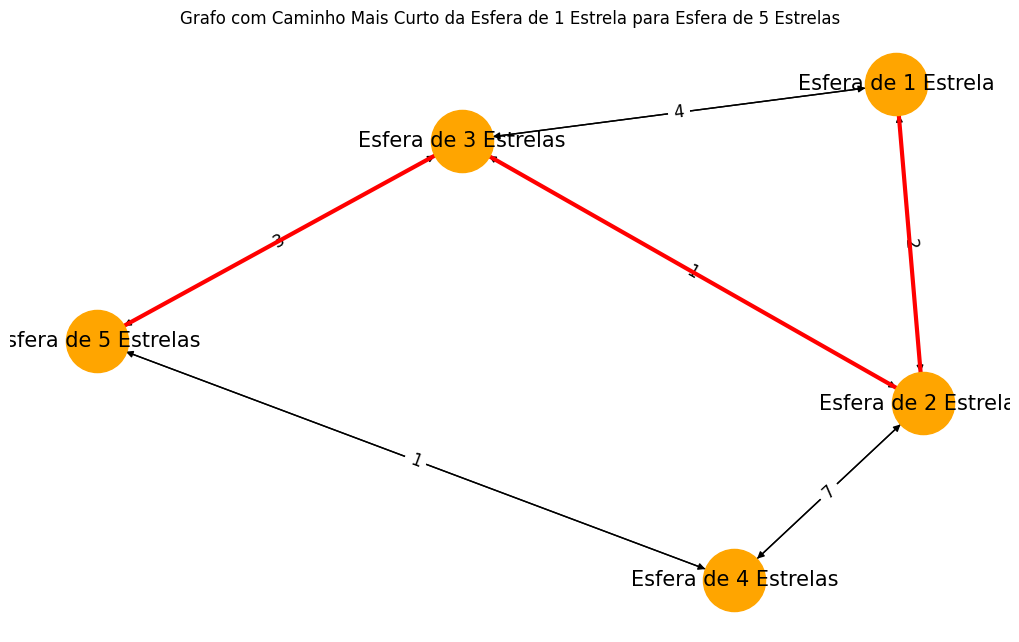

Caminho mais curto da Esfera de 1 Estrela para Esfera de 5 Estrelas: Esfera de 1 Estrela -> Esfera de 2 Estrelas -> Esfera de 3 Estrelas -> Esfera de 5 Estrelas
Comprimento do caminho mais curto: 6


In [30]:
#Grafo caminho mais curto da esfera de 1 estrela para a esfera de 5 estrelas
import networkx as nx
import matplotlib.pyplot as plt

# Grafo de exemplo
graph = {
    'Esfera de 1 Estrela': [('Esfera de 2 Estrelas', 2), ('Esfera de 3 Estrelas', 4)],
    'Esfera de 2 Estrelas': [('Esfera de 1 Estrela', 2), ('Esfera de 3 Estrelas', 1), ('Esfera de 4 Estrelas', 7)],
    'Esfera de 3 Estrelas': [('Esfera de 1 Estrela', 4), ('Esfera de 2 Estrelas', 1), ('Esfera de 5 Estrelas', 3)],
    'Esfera de 4 Estrelas': [('Esfera de 2 Estrelas', 7), ('Esfera de 5 Estrelas', 1)],
    'Esfera de 5 Estrelas': [('Esfera de 3 Estrelas', 3), ('Esfera de 4 Estrelas', 1)],
}

# Criação do grafo direcionado
G = nx.DiGraph()
for node, edges in graph.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)

# Cálculo do caminho mais curto usando Dijkstra
origem = 'Esfera de 1 Estrela'
destino = 'Esfera de 5 Estrelas'
path = nx.dijkstra_path(G, origem, destino, weight='weight')
shortest_path_length = nx.dijkstra_path_length(G, origem, destino, weight='weight')

# Gerar posições dos nós para o layout "Spring"
pos = nx.spring_layout(G)

# Gerar os rótulos das arestas com os pesos
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

# Desenhando o grafo
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=2000, font_size=15, font_color='black')

# Adicionando os rótulos das arestas (pesos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Destacando o caminho mais curto
if path:
    edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=3)

plt.title(f"Grafo com Caminho Mais Curto da {origem} para {destino}")
plt.show()

# Exibindo o caminho e o comprimento
print(f"Caminho mais curto da {origem} para {destino}: {' -> '.join(path)}")
print(f"Comprimento do caminho mais curto: {shortest_path_length}")
